# ML Zoomcamp Cohort 2024
# Homework 2

### Imports


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import skew, kurtosis

In [24]:
laptops_df = pd.read_csv("../data/laptops.csv")
laptops_df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [25]:
laptops_df.columns = laptops_df.columns.str.lower().str.replace(' ', '_')
laptops_df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [26]:
laptops_df = laptops_df[['ram','storage','screen','final_price']]
laptops_df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### EDA
- Look at the final_price variable. Does it have a long tail?

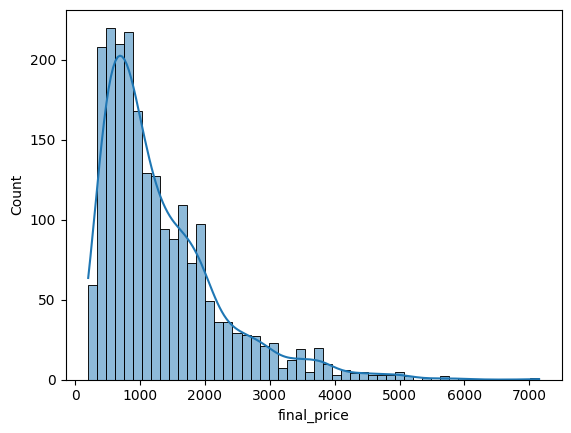

In [27]:
sns.histplot(laptops_df['final_price'], kde=True, bins=50)
plt.show()

In [28]:
skewness = skew(laptops_df['final_price'])
kurt = kurtosis(laptops_df['final_price'])
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurt}')

Skewness: 1.6484419982102294
Kurtosis: 3.4306207518398493


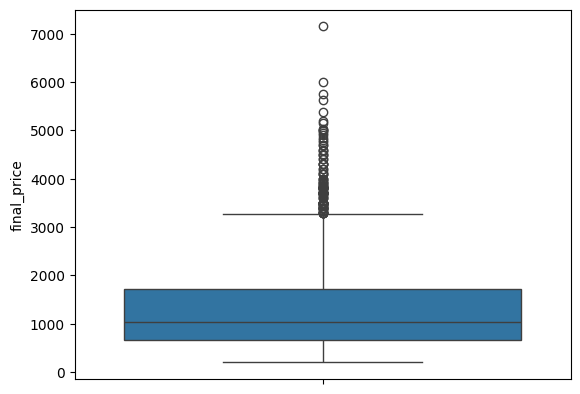

In [29]:
sns.boxplot(laptops_df['final_price'])
plt.show()

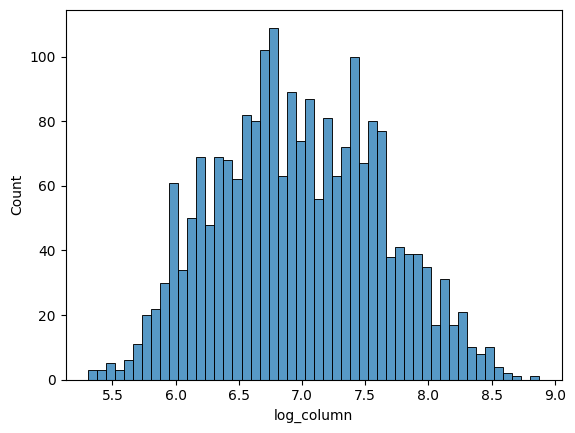

In [43]:
import numpy as np
laptops_df['log_column'] = np.log(laptops_df['final_price'] + 1)  # Adding 1 to avoid log(0)
sns.histplot(laptops_df['log_column'], bins=50)
plt.show()
laptops_df = laptops_df.drop(columns='log_column')


### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [44]:
print(f"Which column has missing values?\n {laptops_df.isnull().any()}")

Which column has missing values?
 ram            False
storage        False
screen          True
final_price    False
dtype: bool


### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [45]:
median_ram = laptops_df['ram'].median()
print(f"the value of the median of the variable 'ram' is: {median_ram}")


the value of the median of the variable 'ram' is: 16.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [46]:
def train_val_test_split(df, target_column='final_price', seed=42, print_output=True, skew=True):
    # Determine the number of rows in the dataset
    n = len(df)

    # Define the sizes for validation, test, and training sets (20%, 20%, and 60%)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    # Shuffle the indices based on the seed provided
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # Split the dataframe into train, validation, and test sets
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop=True)

    if skew:
        # Extract the target variable and apply the log transformation
        y_train = np.log1p(df_train[target_column].values)
        y_val = np.log1p(df_val[target_column].values)
        y_test = np.log1p(df_test[target_column].values)
    else:
        y_train = df_train[target_column].values
        y_val = df_val[target_column].values
        y_test = df_test[target_column].values

    # Remove the target column from the datasets
    df_train = df_train.drop(columns=[target_column])
    df_val = df_val.drop(columns=[target_column])
    df_test = df_test.drop(columns=[target_column])

    if print_output:
        # Print the number of rows in each target set
        print(f"y_train has {len(y_train)} rows")
        print(f"y_val has {len(y_val)} rows")
        print(f"y_test has {len(y_test)} rows")

    # Return the train, validation, and test datasets and target variables
    return df_train, df_val, df_test, y_train, y_val, y_test

In [51]:
df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(laptops_df)

y_train has 1296 rows
y_val has 432 rows
y_test has 432 rows


In [52]:

print("Skewness after log transform:", skew(y_train))
print("Kurtosis after log transform:", kurtosis(y_train))


Skewness after log transform: 0.13600055432329783
Kurtosis after log transform: -0.5705731629336643


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [53]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [60]:
X_train_0 = df_train.fillna(0)
X_val_0 = df_val.fillna(0)

# Train the model with 0-filled data
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train)

# Predict and calculate RMSE on validation set
y_pred_0 = model_0.predict(X_val_0)
rmse_0 = rmse(y_val, y_pred_0)

# Step 3: Option 2 - Fill missing values with the mean (calculated from training data)
mean_val = df_train.mean()  # Calculate the mean of training data
X_train_mean = df_train.fillna(mean_val)
X_val_mean = df_val.fillna(mean_val)

# Train the model with mean-filled data
model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train)

# Predict and calculate RMSE on validation set
y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = rmse(y_val, y_pred_mean)

# Round the RMSE values
rmse_0_rounded = round(rmse_0, 2)
rmse_mean_rounded = round(rmse_mean, 2)

# Output RMSEs for comparison
print(f"RMSE with 0-filled: {rmse_0_rounded}")
print(f"RMSE with mean-filled: {rmse_mean_rounded}")

# Step 4: Compare the RMSE values and determine the better option
if rmse_0_rounded < rmse_mean_rounded:
    print("Filling with 0 gives a better RMSE.")
elif rmse_mean_rounded < rmse_0_rounded:
    print("Filling with mean gives a better RMSE.")
else:
    print("Both options give equally good RMSE.")

RMSE with 0-filled: 0.43
RMSE with mean-filled: 0.43
Both options give equally good RMSE.


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [61]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# Initialize a dictionary to store RMSE values for each r
rmse_values = {}

df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(laptops_df)

# Train Ridge regression models for each r value
for r in r_values:
    # Initialize the Ridge model with the current r value
    model = Ridge(alpha=r)

    # Train the model
    model.fit(X_train_0, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_val_0)

    # Calculate RMSE for the validation set
    rmse_ridge = rmse(y_val, y_pred)

    # Round the RMSE to 2 decimal places
    rmse_rounded = round(rmse_ridge, 2)

    # Store the RMSE for this r
    rmse_values[r] = rmse_ridge #rmse_rounded

# Step 5: Find the best r value (smallest RMSE)
best_r = min(rmse_values, key=rmse_values.get)
best_rmse = rmse_values[best_r]

# Output the RMSE for each r value
for r, rmse_ in rmse_values.items():
    print(f"r = {r}: RMSE = {rmse_}")

# Output the best r and corresponding RMSE
print(f"\nBest r: {best_r} with RMSE: {best_rmse}")

y_train has 1296 rows
y_val has 432 rows
y_test has 432 rows
r = 0: RMSE = 0.42886353154744056
r = 0.01: RMSE = 0.4288635347236401
r = 0.1: RMSE = 0.4288635633132445
r = 1: RMSE = 0.42886384958586404
r = 5: RMSE = 0.4288651301536836
r = 10: RMSE = 0.4288667496179548
r = 100: RMSE = 0.4288991510361073

Best r: 0 with RMSE: 0.42886353154744056


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


In [64]:
# List of seed values to try
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# List to store RMSE values for each seed
rmse_scores = []

# Step 1: Loop through each seed
for seed in seeds:
    # Step 2: Split the data into train (60%), validation (20%), and test (20%) sets
    X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(laptops_df, seed=seed, print_output=False, skew=False)


    # Step 3: Fill missing values with 0
    X_train_filled = X_train.fillna(0)
    X_val_filled = X_val.fillna(0)

    # Step 4: Train a Linear Regression model without regularization
    model = LinearRegression()
    model.fit(X_train_filled, y_train)

    # Step 5: Predict on the validation set
    y_pred = model.predict(X_val_filled)

    # Calculate RMSE for the validation set
    rmse_val = rmse(y_val, y_pred)

    # Store the RMSE for this seed
    rmse_scores.append(rmse_val)

# Step 6: Compute the standard deviation of the RMSE scores
std_rmse = np.std(rmse_scores)

# Round the standard deviation to 3 decimal places
std_rmse_rounded = round(std_rmse, 3)

# Output the standard deviation
print(f"Standard deviation of RMSE scores: {std_rmse_rounded}")

Standard deviation of RMSE scores: 29.176


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [63]:
# Step 1: Define train val test

df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(
        laptops_df, seed=9, print_output=False, skew=False
    )
# Step 2: Combine train and validation sets
df_train_combined = pd.concat([df_train, df_val]).reset_index(drop=True)
y_train_combined = np.concatenate([y_train, y_val])

# Step 3: Fill missing values with 0
df_train_combined_filled = df_train_combined.fillna(0)
df_test_filled = df_test.fillna(0)

# Step 4: Train a Ridge Regression model with r=0.001
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(df_train_combined_filled, y_train_combined)

# Step 5: Make predictions on the test set
y_pred_test = ridge_model.predict(df_test_filled)

# Step 6: Calculate RMSE on the test dataset
rmse_test = rmse(y_test, y_pred_test)

# Print RMSE rounded to 2 decimal places
rmse_test_rounded = round(rmse_test, 2)
print(f"RMSE on the test set: {rmse_test_rounded}")

RMSE on the test set: 608.61
